In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from utils import *

In [90]:
from config import ACCOUNT_NAME, ACCOUNT_KEY

In [93]:
import pandas as pd
from azure.storage.blob import BlobServiceClient

# Replace with your actual connection string from the Azure Portal
connection_string = f"DefaultEndpointsProtocol=https;AccountName={ACCOUNT_NAME};AccountKey={ACCOUNT_KEY};EndpointSuffix=core.windows.net"

# Define details for Blob 1 (e.g., title.basics.tsv.gz in the "movies" container)
container_name1 = "movies"
blob_name1 = "title.basics.tsv.gz"
download_path1 = "title.basics.tsv.gz"  # Local file name for blob 1

# Define details for Blob 2 (e.g., title.ratings.tsv.gz in the "movies_rating" container)
container_name2 = "movie-ratings"
blob_name2 = "title.ratings.tsv.gz"
download_path2 = "title.ratings.tsv.gz"  # Local file name for blob 2

# Create the BlobServiceClient
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

# Get container clients for both containers
container_client1 = blob_service_client.get_container_client(container_name1)
container_client2 = blob_service_client.get_container_client(container_name2)

# Download Blob 1: title.basics.tsv.gz
with open(download_path1, "wb") as file1:
    blob_data1 = container_client1.download_blob(blob_name1)
    file1.write(blob_data1.readall())
print(f"Downloaded '{blob_name1}' from container '{container_name1}' to '{download_path1}'")

# Download Blob 2: title.ratings.tsv.gz
with open(download_path2, "wb") as file2:
    blob_data2 = container_client2.download_blob(blob_name2)
    file2.write(blob_data2.readall())
print(f"Downloaded '{blob_name2}' from container '{container_name2}' to '{download_path2}'")

# Optionally, load the downloaded files into pandas DataFrames
df_basics = pd.read_csv(download_path1, sep='\t', compression='gzip', low_memory=False)
df_ratings = pd.read_csv(download_path2, sep='\t', compression='gzip', low_memory=False)

print("First few rows of title.basics.tsv.gz:")
print(df_basics.head())

print("First few rows of title.ratings.tsv.gz:")
print(df_ratings.head())


Downloaded 'title.basics.tsv.gz' from container 'movies' to 'title.basics.tsv.gz'
Downloaded 'title.ratings.tsv.gz' from container 'movie-ratings' to 'title.ratings.tsv.gz'
First few rows of title.basics.tsv.gz:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animat

In [3]:
df_basics.shape

(11567706, 9)

In [4]:
df_ratings.shape

(1554226, 3)

In [5]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11567706 entries, 0 to 11567705
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 794.3+ MB


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554226 entries, 0 to 1554225
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1554226 non-null  object 
 1   averageRating  1554226 non-null  float64
 2   numVotes       1554226 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [7]:
df_basics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,11567706,11567706,11567687,11567687,11567706,11567706,11567706,11567706,11566965
unique,11567706,11,5202172,5227372,39,152,99,961,2387
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,8898916,54699,54699,11192956,1427408,11429270,7850769,1304666


In [8]:
df_basics.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [9]:
df_basics.isnull().sum()

tconst              0
titleType           0
primaryTitle       19
originalTitle      19
isAdult             0
startYear           0
endYear             0
runtimeMinutes      0
genres            741
dtype: int64

In [10]:
df_basics[df_basics['primaryTitle'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1253127,tt10516578,video,NaN,NaN,0,2017,\N,\N,"Music,Short"
3426959,tt14510930,tvEpisode,NaN,NaN,0,\N,\N,\N,\N
4068738,tt15700278,tvEpisode,NaN,NaN,0,2021,\N,\N,Talk-Show
4549224,tt17042812,movie,NaN,NaN,0,2010,\N,87,Thriller
5056373,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
5251952,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
5590051,tt21883066,tvEpisode,NaN,NaN,0,2022,\N,\N,"News,Talk-Show"
5859376,tt2305914,tvEpisode,NaN,NaN,0,\N,\N,\N,"Comedy,Talk-Show"
5859383,tt2305918,tvEpisode,NaN,NaN,0,\N,\N,\N,"Comedy,Talk-Show"
7525870,tt31462159,tvEpisode,NaN,NaN,0,2024,\N,\N,Drama


In [11]:
df_clean = df_basics.dropna()

In [12]:
df_clean

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11567701,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
11567702,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
11567703,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
11567704,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [13]:
df_copy = df_clean.copy()
df_copy['startYear'] = pd.to_numeric(df_clean['startYear'], errors='coerce')
df_copy.dropna(subset=['startYear'], inplace=True)  # remove rows where startYear couldn't be converted
df_copy['startYear'] = df_copy['startYear'].astype(int)  # if you want integers

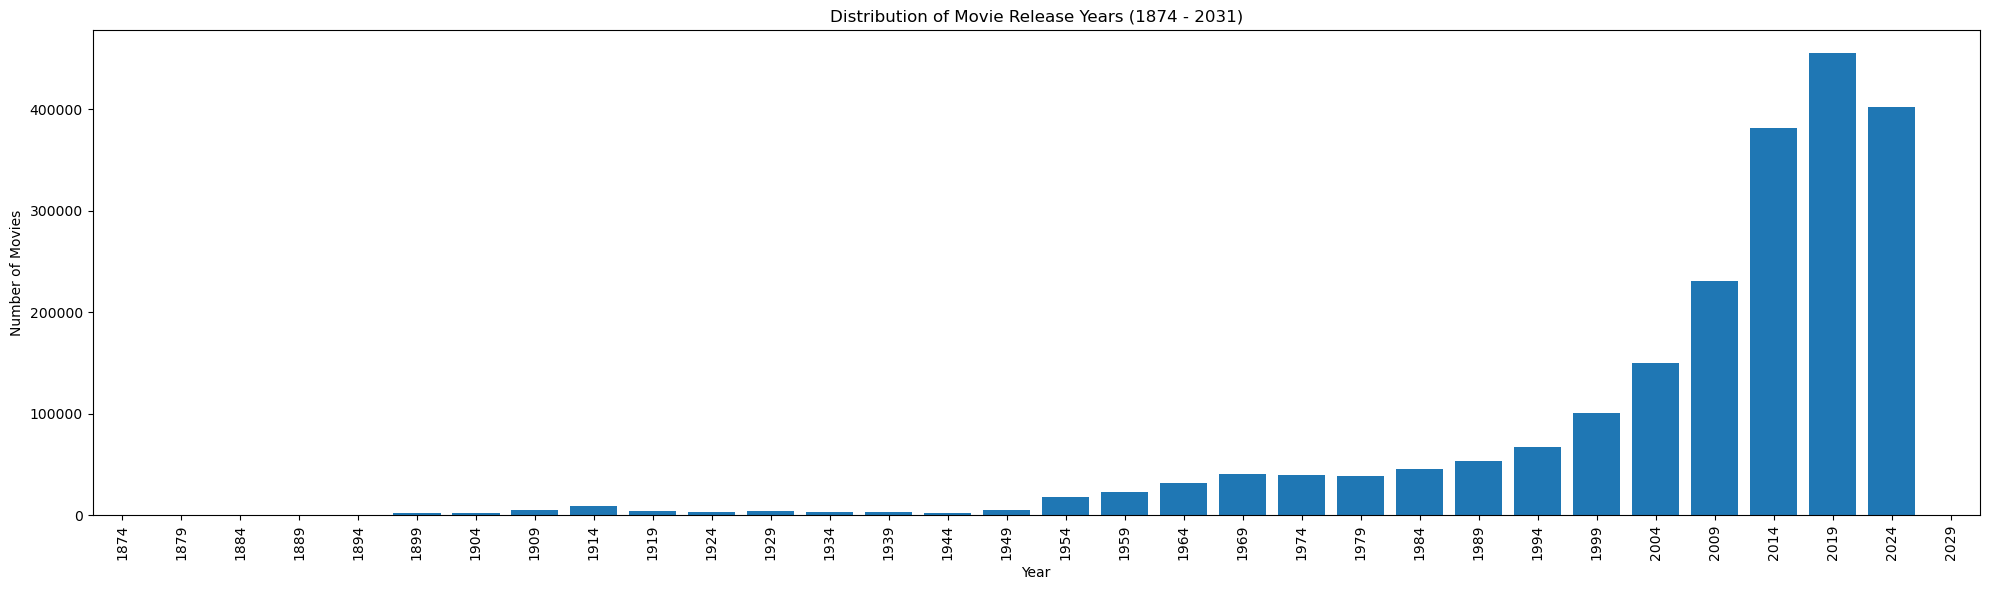

In [14]:
# Plot the distribution of movie release years
years_range = np.arange(1874, 2032, 5)  # 2032 is exclusive so this covers 1874 to 2031

year_counts = df_copy['startYear'].value_counts().sort_index()
# Reindex the series to include every year in the specified range, filling missing values with 0
year_counts = year_counts.reindex(years_range, fill_value=0)

# Plot the bar graph
plt.figure(figsize=(20, 6))
ax = year_counts.plot(kind='bar', width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
ax.set_title('Distribution of Movie Release Years (1874 - 2031)')

# Optionally, set the x-axis limits (adjusting slightly for a clean view)
plt.xlim(-0.5, len(years_range)-0.5)

plt.tight_layout()
plt.show()

In [15]:
df_filtered = df_clean[df_clean['titleType'] == 'movie']

In [16]:
df_filtered.loc[:, 'genres_str'] = df_filtered['genres'].astype(str)

/var/folders/mx/zvd2kjjx4z704zflxmthfp380000gn/T/ipykernel_97161/2807912466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'genres_str'] = df_filtered['genres'].astype(str)


In [17]:
# Combine features (for instance, genres)
df_filtered = df_filtered[df_filtered['genres_str'].notnull() & (df_filtered['genres'] != '')]
df_filtered['combined_features'] = df_filtered['genres'].apply(lambda x: x.replace(',', ' ') if isinstance(x, str) else str(x))

In [18]:
df_filtered

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_str,combined_features
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,Romance,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport","Documentary,News,Sport",Documentary News Sport
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,\N,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","Action,Adventure,Biography",Action Adventure Biography
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...
11567597,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary,Documentary,Documentary
11567624,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary,Documentary,Documentary
11567636,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,Comedy,Comedy
11567646,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,Drama,Drama


In [19]:
df_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2145
1,tt0000002,5.5,291
2,tt0000003,6.5,2182
3,tt0000004,5.3,187
4,tt0000005,6.2,2924
...,...,...,...
1554221,tt9916846,5.8,6
1554222,tt9916848,5.8,6
1554223,tt9916850,5.8,6
1554224,tt9916852,5.8,6


In [20]:
df_merged = pd.merge(df_filtered, df_ratings, on='tconst', how='left')

mean_rating = df_merged['averageRating'].astype(float).mean()
df_merged['averageRating'] = df_merged['averageRating'].fillna(mean_rating)

df_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_str,combined_features,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,Romance,Romance,5.4,223.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport","Documentary,News,Sport",Documentary News Sport,5.3,556.0
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,\N,\N,3.8,22.0
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","Action,Adventure,Biography",Action Adventure Biography,6.0,982.0
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,Drama,Drama,5.7,32.0


In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711208 entries, 0 to 711207
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             711208 non-null  object 
 1   titleType          711208 non-null  object 
 2   primaryTitle       711208 non-null  object 
 3   originalTitle      711208 non-null  object 
 4   isAdult            711208 non-null  object 
 5   startYear          711208 non-null  object 
 6   endYear            711208 non-null  object 
 7   runtimeMinutes     711208 non-null  object 
 8   genres             711208 non-null  object 
 9   genres_str         711208 non-null  object 
 10  combined_features  711208 non-null  object 
 11  averageRating      711208 non-null  float64
 12  numVotes           328016 non-null  float64
dtypes: float64(2), object(11)
memory usage: 70.5+ MB


In [22]:
m = 1000
overall_mean = df_merged['averageRating'].mean()
df_merged['weightedRating'] = df_merged.apply(lambda row: compute_weighted_rating(row, m, overall_mean), axis = 1)

In [23]:
df_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_str,combined_features,averageRating,numVotes,weightedRating
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,Romance,Romance,5.4,223.0,6.018084
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport","Documentary,News,Sport",Documentary News Sport,5.3,556.0,5.850075
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,\N,\N,3.8,22.0,6.105202
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","Action,Adventure,Biography",Action Adventure Biography,6.0,982.0,6.078666
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,Drama,Drama,5.7,32.0,6.141779


In [83]:
df_merged.to_csv('df_merged.csv', index = False)

In [54]:
df_merged

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_str,combined_features,averageRating,numVotes,weightedRating
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,Romance,Romance,5.400000,223.0,6.018084
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport","Documentary,News,Sport",Documentary News Sport,5.300000,556.0,5.850075
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,\N,\N,3.800000,22.0,6.105202
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","Action,Adventure,Biography",Action Adventure Biography,6.000000,982.0,6.078666
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,Drama,Drama,5.700000,32.0,6.141779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711203,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary,Documentary,Documentary,6.155916,NaN,NaN
711204,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary,Documentary,Documentary,6.155916,NaN,NaN
711205,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,Comedy,Comedy,7.700000,9.0,6.169689
711206,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,Drama,Drama,7.000000,12.0,6.165925


In [64]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711208 entries, 0 to 711207
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             711208 non-null  object 
 1   titleType          711208 non-null  object 
 2   primaryTitle       711208 non-null  object 
 3   originalTitle      711208 non-null  object 
 4   isAdult            711208 non-null  object 
 5   startYear          711208 non-null  object 
 6   endYear            711208 non-null  object 
 7   runtimeMinutes     711208 non-null  object 
 8   genres             711208 non-null  object 
 9   genres_str         711208 non-null  object 
 10  combined_features  711208 non-null  object 
 11  averageRating      711208 non-null  float64
 12  numVotes           328016 non-null  float64
 13  weightedRating     328016 non-null  float64
dtypes: float64(3), object(11)
memory usage: 76.0+ MB


In [68]:
df_merged["primaryTitle"] = df_merged["primaryTitle"].astype(str)
df_merged['genres_str'] = df_merged['genres_str'].astype(str)